In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('.data/test.tsv', sep='\t')

In [4]:
data

,chrom,start,end,patch_i,max_corr,perc_nan,left,right
0,chr1,0,10000,0,0.308831,0.283333,0.95,1.000000
1,chr1,10000,20000,0,0.308831,0.283333,0.95,1.000000
2,chr1,20000,30000,0,0.308831,0.283333,0.95,0.999582
3,chr1,30000,40000,0,0.308831,0.283333,1.00,0.998379
4,chr1,40000,50000,0,0.308831,0.283333,1.00,0.999884
...,...,...,...,...,...,...,...,...
607495,chrY,56950000,56960000,2024,NaN,0.953333,NaN,NaN
607496,chrY,56960000,56970000,2024,NaN,0.953333,NaN,NaN
607497,chrY,56970000,56980000,2024,NaN,0.953333,NaN,NaN
607498,chrY,56980000,56990000,2024,NaN,0.953333,NaN,NaN


In [12]:
data_chr1 = data.loc[data['chrom'] == 'chr1']

In [13]:
data_chr1

,chrom,start,end,patch_i,max_corr,perc_nan,left,right
0,chr1,0,10000,0,0.308831,0.283333,0.950000,1.000000
1,chr1,10000,20000,0,0.308831,0.283333,0.950000,1.000000
2,chr1,20000,30000,0,0.308831,0.283333,0.950000,0.999582
3,chr1,30000,40000,0,0.308831,0.283333,1.000000,0.998379
4,chr1,40000,50000,0,0.308831,0.283333,1.000000,0.999884
...,...,...,...,...,...,...,...,...
49195,chr1,247450000,247460000,163,0.036991,0.000000,0.450098,0.450692
49196,chr1,247460000,247470000,163,0.036991,0.000000,1.000000,1.000000
49197,chr1,247470000,247480000,163,0.036991,0.000000,1.000000,0.950000
49198,chr1,247480000,247490000,163,0.036991,0.000000,0.450027,0.950000


In [18]:
patch_num = max(data_chr1.patch_i.to_numpy())

In [29]:
even_second_half = np.concatenate([i * 300 + np.arange(150,300) for i in range(0, patch_num, 2)])
odd_first_half = np.concatenate([i * 300 + np.arange(0,150) for i in range(1, patch_num + patch_num % 2, 2)])

In [34]:
overlap_even = data.iloc[even_second_half]

In [35]:
overlap_odd = data.iloc[odd_first_half]

In [42]:
overlap_merged = pd.merge(overlap_even.iloc[:,[0,1,2,6,7]], overlap_odd.iloc[:,[0,1,2,6,7]], on=["chrom", "start", "end"], suffixes=('_even', '_odd'))

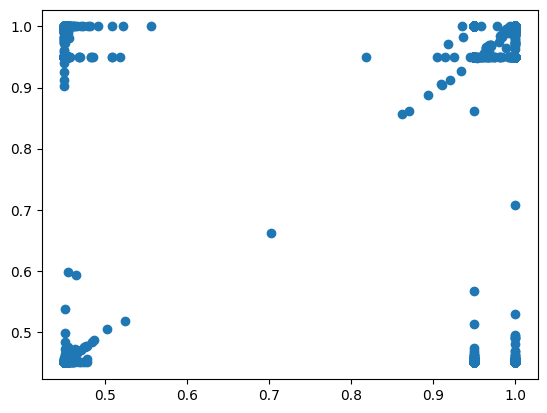

In [43]:
plt.plot(overlap_merged["left_even"], overlap_merged["left_odd"], 'o')

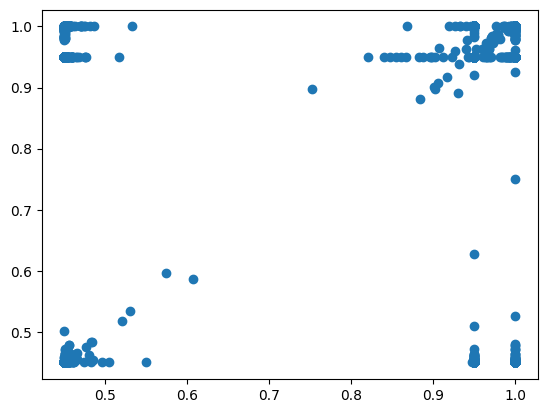

In [44]:
plt.plot(overlap_merged["right_even"], overlap_merged["right_odd"], 'o')

In [49]:
nan_mas = np.logical_and(np.logical_not(np.isnan(overlap_merged["left_even"])), np.logical_not(np.isnan(overlap_merged["left_odd"])))
np.corrcoef(overlap_merged["left_even"].to_numpy()[nan_mas], overlap_merged["left_odd"].to_numpy()[nan_mas])[0,1]

0.6731463571886037

In [50]:
np.corrcoef(overlap_merged["right_even"].to_numpy()[nan_mas], overlap_merged["right_odd"].to_numpy()[nan_mas])[0,1]

0.6620914516663865

In [54]:
data.describe()

,start,end,patch_i,max_corr,perc_nan,left,right
count,6.075000e+05,6.075000e+05,607500.000000,546900.000000,607500.000000,5.469000e+05,5.469000e+05
mean,7.664611e+07,7.665611e+07,1012.000000,0.047607,0.095542,8.100472e-01,8.102625e-01
std,5.442468e+07,5.442468e+07,584.567557,0.051061,0.260580,2.504037e-01,2.503571e-01
min,0.000000e+00,1.000000e+04,0.000000,0.008265,0.000000,1.000000e-09,1.000000e-09
25%,3.239000e+07,3.240000e+07,506.000000,0.028353,0.000000,4.506460e-01,4.506550e-01
50%,6.663000e+07,6.664000e+07,1012.000000,0.035523,0.000000,9.500000e-01,9.500000e-01
75%,1.120400e+08,1.120500e+08,1518.000000,0.044805,0.006667,1.000000e+00,1.000000e+00
max,2.474900e+08,2.475000e+08,2024.000000,0.450784,1.000000,1.000000e+00,1.000000e+00


(array([475800.,  36900.,   5100.,   6600.,   6300.,   6300.,   6000.,
          1500.,   1800.,    600.]),
 array([0.00826491, 0.05251687, 0.09676883, 0.14102079, 0.18527274,
        0.2295247 , 0.27377666, 0.31802862, 0.36228057, 0.40653253,
        0.45078449]),
 <BarContainer object of 10 artists>)

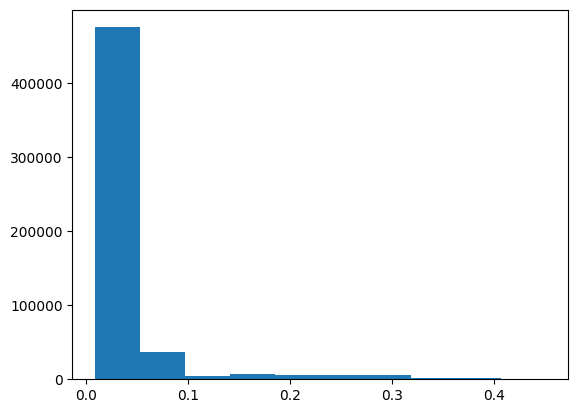

In [53]:
plt.hist(data["max_corr"])